In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats
# Sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectFromModel

In [38]:
red_wine=pd.read_csv("./Data_Set/winequality-red.csv",sep=";")
white_wine=pd.read_csv("./Data_Set/winequality-white.csv",sep=";")

In [39]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**# NEW COLUMN**

In [41]:
red_wine2=red_wine.assign(wine_color="red")
red_wine2.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
red_wine2["quality_label"]=red_wine2["quality"].apply(lambda value:"low" if value <=5 else "medium"
if value <=7 else "high" )
red_wine2.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [43]:
white_wine2=white_wine.assign(wine_color="white")
white_wine2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [44]:
white_wine2["quality_label"]=white_wine2["quality"].apply(lambda value: "low" if value<=5 else "medium"
if value<=7 else "high")
white_wine2.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [45]:
red_wine2["quality_label"]=pd.Categorical(red_wine2["quality_label"],categories=("low","medium","high"))

In [46]:
white_wine2["quality_label"]=pd.Categorical(white_wine2["quality_label"],categories=("low","medium","high"))

**Concat**

In [47]:
wines=pd.concat([red_wine2,white_wine2])
wines.shape

(6497, 14)

**DATA CLEANING**

In [48]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
quality_label           0
dtype: int64

In [49]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
quality_label           0
dtype: int64

In [50]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [51]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_color            6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [52]:
wines.rename(columns={"fixed acidity":"fixed_acidity","volatile acidity":"volatile_acidity","citric acid":"citric_acid","residual sugar":"residual_sugar","free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"},inplace=True)

MACHINE LEARNING
ENCODING

In [53]:
le=LabelEncoder()

In [54]:
white_wine2["Quality_Cat"]=le.fit_transform(white_wine2["quality_label"])

In [55]:

white_wine2[white_wine2["Quality_Cat"] == 1] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color,quality_label,Quality_Cat
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,5,white,low,1
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5,white,low,1
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5,white,low,1
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5,white,low,1
19,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,white,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,5,white,low,1
4884,6.5,0.33,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.6,5,white,low,1
4888,6.8,0.22,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,white,low,1
4892,6.5,0.23,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,white,low,1


In [56]:
white_wine2.iloc[:, 0:11]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [57]:
white_wine2.iloc[:, [0,1,3,5,8,9,10]]

,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,20.7,45.0,3.00,0.45,8.8
1,6.3,0.30,1.6,14.0,3.30,0.49,9.5
2,8.1,0.28,6.9,30.0,3.26,0.44,10.1
3,7.2,0.23,8.5,47.0,3.19,0.40,9.9
4,7.2,0.23,8.5,47.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,24.0,3.27,0.50,11.2
4894,6.6,0.32,8.0,57.0,3.15,0.46,9.6
4895,6.5,0.24,1.2,30.0,2.99,0.46,9.4
4896,5.5,0.29,1.1,20.0,3.34,0.38,12.8


SPLITING

In [58]:
X=white_wine2.iloc[:, [1,3,5,9,10]] #input
y=white_wine2.Quality_Cat #target
print(y)
print(y.shape)
print(X)
#print(red_wine2.head(1))

0       2
1       2
2       2
3       2
4       2
       ..
4893    2
4894    1
4895    2
4896    2
4897    2
Name: Quality_Cat, Length: 4898, dtype: int64
(4898,)
      volatile acidity  residual sugar  free sulfur dioxide  sulphates  \
0                 0.27            20.7                 45.0       0.45   
1                 0.30             1.6                 14.0       0.49   
2                 0.28             6.9                 30.0       0.44   
3                 0.23             8.5                 47.0       0.40   
4                 0.23             8.5                 47.0       0.40   
...                ...             ...                  ...        ...   
4893              0.21             1.6                 24.0       0.50   
4894              0.32             8.0                 57.0       0.46   
4895              0.24             1.2                 30.0       0.46   
4896              0.29             1.1                 20.0       0.38   
4897              0.21

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 5)
(980, 5)
(3918,)
(980,)


NORMALISATION

In [60]:
# fit scaler on training data
norm=MinMaxScaler().fit(X_train)

In [61]:
# transform training data
X_train_norm=norm.transform(X_train)

In [62]:
# transform testing data
X_test_norm=norm.transform(X_test)

In [63]:
print(X_train_norm)

[[0.19607843 0.09509202 0.12937063 0.43023256 0.48387097]
 [0.14705882 0.01993865 0.16783217 0.20930233 0.67741935]
 [0.29411765 0.06134969 0.07692308 0.18604651 0.35483871]
 ...
 [0.10784314 0.01533742 0.02097902 0.5        0.5       ]
 [0.1372549  0.17638037 0.17832168 0.20930233 0.43548387]
 [0.14705882 0.2101227  0.18181818 0.25581395 0.16129032]]


PREDICTING


In [64]:
#LogisticRegression
lgr=LogisticRegression(multi_class='multinomial',solver='lbfgs', penalty='l2', C=1.0, max_iter = 1000)
lgr.fit(X_train_norm,y_train)



LogisticRegression(max_iter=1000, multi_class='multinomial')

In [65]:
pred_lgr=lgr.predict(X_test_norm)

EVALUATION

In [66]:
# 0- high 
#1 - low
#2- medium
label=["high","low","medium"]
cm=confusion_matrix(y_test,pred_lgr)
pd.DataFrame(cm,index=label,columns=label)

,high,low,medium
high,0,0,37
low,0,149,175
medium,0,76,543


In [67]:
print("accuracy_score -",accuracy_score(y_test,pred_lgr))

accuracy_score - 0.7061224489795919


In [68]:
print(classification_report(y_test,pred_lgr,target_names=["high","low","medium"]))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        37
         low       0.66      0.46      0.54       324
      medium       0.72      0.88      0.79       619

    accuracy                           0.71       980
   macro avg       0.46      0.45      0.44       980
weighted avg       0.67      0.71      0.68       980



/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MODEL IMPROVEMENT

In [69]:
white_wine2.iloc[:,0:11]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


Feature: 0, Score: -1.18492
Feature: 1, Score: 1.05032
Feature: 2, Score: 1.55705
Feature: 3, Score: -0.10644
Feature: 4, Score: 3.75560


/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


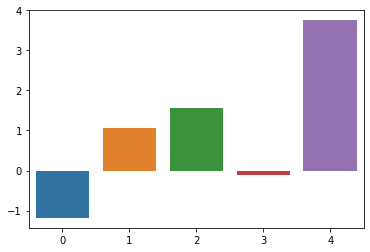

In [70]:
# get importance
importance = lgr.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

sns.barplot([x for x in range(len(importance))],importance)
plt.show()



Feature: 0, Score: 3.76572
Feature: 1, Score: -2.12302
Feature: 2, Score: -1.60568
Feature: 3, Score: -0.49728
Feature: 4, Score: -4.82506


/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


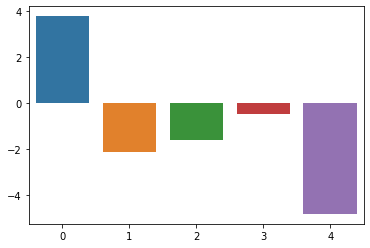

In [71]:

importance = lgr.coef_[1]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
features=["fixed acidity","volatile acidity","citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]
sns.barplot([x for x in range(len(importance))],importance)
plt.show()

Feature: 0, Score: -2.58080
Feature: 1, Score: 1.07270
Feature: 2, Score: 0.04864
Feature: 3, Score: 0.60372
Feature: 4, Score: 1.06946


/Users/Yanaorfin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


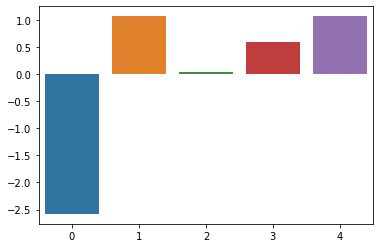

In [72]:

importance = lgr.coef_[2]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
features=["fixed acidity","volatile acidity","citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]
sns.barplot([x for x in range(len(importance))],importance)
plt.show()